# Лабараторная работа №3 - Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных
---------------
## Цель работы:
---------------
Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

## Задание:
---------------
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
   * обработку пропусков в данных;
   * кодирование категориальных признаков;
   * масштабирование данных;

## Выполнение:
---------------

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

#Загрузка датасета
data = pd.read_csv('data/laba_3/menu_1.csv', sep = ';')

data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,NaN,17,NaN,17.0,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,NaN,17,NaN,NaN,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,NaN,...,29,10,NaN,17,NaN,NaN,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,NaN,...,30,10,NaN,17,NaN,NaN,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,NaN,...,30,10,NaN,17,NaN,NaN,6,0,25,10


In [95]:
# Выведем размер датасета
data.shape

(260, 24)

In [96]:
# Выведем список пустых колонок с числом пустых значений в них
data.isnull().sum()

Category                           0
Item                               0
Serving Size                       0
Calories                           0
Calories from Fat                  0
Total Fat                          0
Total Fat (% Daily Value)          0
Saturated Fat                      0
Saturated Fat (% Daily Value)      0
Trans Fat                         17
Cholesterol                        0
Cholesterol (% Daily Value)        0
Sodium                             0
Sodium (% Daily Value)             0
Carbohydrates                      0
Carbohydrates (% Daily Value)      0
Dietary Fiber                    259
Dietary Fiber (% Daily Value)      0
Sugars                           171
Protein                           11
Vitamin A (% Daily Value)          0
Vitamin C (% Daily Value)          0
Calcium (% Daily Value)            0
Iron (% Daily Value)               0
dtype: int64

## 1. Обработка пропусков в данных
### 1.1 Простые стратегии - удаление или заполнение нулями
-----------------

In [97]:
#Создадим датасет, где удалены колонки содержащие пустые значения
data_red1 = data.dropna(axis = 1, how = 'any')
print((data.shape, data_red1.shape))
data_red1.head()

((260, 24), (260, 20))


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,260,87,750,31,31,10,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,25,8,770,32,30,10,17,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,45,15,780,33,29,10,17,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,285,95,860,36,30,10,17,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,50,16,880,37,30,10,17,6,0,25,10


In [98]:
#Создадим датасет, где заполним все пустые значения нулями
data_red2 = data.fillna(0)
print((data.shape, data_red1.shape))
data_red2.head()

((260, 24), (260, 20))


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,0.0,17,0.0,17.0,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,0.0,17,0.0,0.0,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,0.0,17,0.0,0.0,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,0.0,17,0.0,0.0,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,0.0,17,0.0,0.0,6,0,25,10


### 1.2 "Внедрение значений" - импьютация (imputation)
#### 1.2.1. Обработка пропусков в числовых данных
------------------
Определим процентное содержание пустых значений в колонках датасета

In [99]:
total_count = data.shape[0]
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Trans Fat. Тип данных float64. Количество пустых значений 17, 6.54%.
Колонка Dietary Fiber. Тип данных float64. Количество пустых значений 259, 99.62%.
Колонка Sugars. Тип данных float64. Количество пустых значений 171, 65.77%.
Колонка Protein. Тип данных float64. Количество пустых значений 11, 4.23%.


In [100]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Trans Fat,Dietary Fiber,Sugars,Protein
0,0.0,NaN,NaN,17.0
1,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


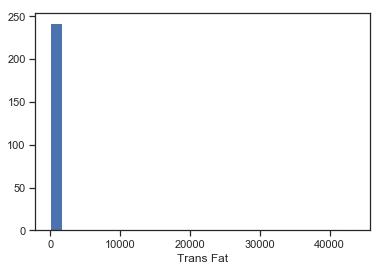

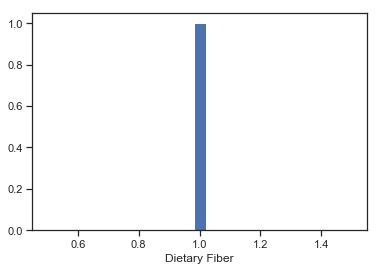

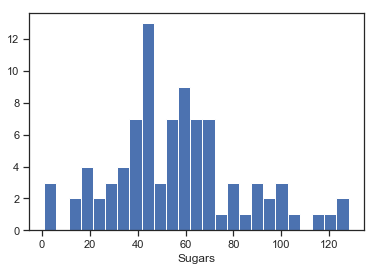

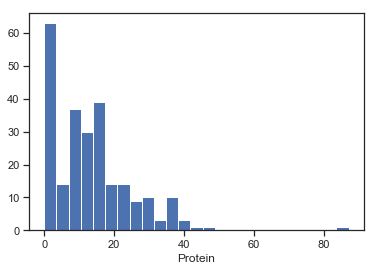

In [101]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 25)
    plt.xlabel(col)
    plt.show()

In [102]:
# Фильтр по пустым значениям поля Proteins и сравнение с индексами строк
flt_index = data[data['Protein'].isnull()].index
print(flt_index)
data[data['Protein'].isnull()]

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,NaN,17,NaN,NaN,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,NaN,...,29,10,NaN,17,NaN,NaN,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,NaN,...,30,10,NaN,17,NaN,NaN,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,NaN,...,30,10,NaN,17,NaN,NaN,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,NaN,...,31,10,NaN,18,NaN,NaN,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,NaN,...,38,13,NaN,7,NaN,NaN,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,NaN,...,43,14,NaN,12,NaN,NaN,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,NaN,...,36,12,NaN,7,NaN,NaN,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,NaN,...,42,14,NaN,12,NaN,NaN,6,8,15,15
10,Breakfast,Sausage Biscuit (Regular Biscuit),4.1 oz (117 g),430,240,27.0,42,12.0,62,NaN,...,34,11,NaN,6,NaN,NaN,0,0,6,15


In [103]:
# Создадим новый датасет
data_num_Protein = data_num[['Protein']]

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Protein)

# Определим показатели центра распределения
strategies=['mean', 'most_frequent']

def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Protein)
    return data_num_imp[mask_missing_values_only]

strategies[0], test_num_impute(strategies[0])

('mean',
 array([13.12449799, 13.12449799, 13.12449799, 13.12449799, 13.12449799,
        13.12449799, 13.12449799, 13.12449799, 13.12449799, 13.12449799,
        13.12449799]))

In [104]:
strategies[1], test_num_impute(strategies[1])

('most_frequent', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [105]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

data[['Sugars']].describe()

,Sugars
count,89.000000
mean,55.966292
std,26.956804
min,1.000000
25%,41.000000
50%,54.000000
75%,70.000000
max,128.000000


In [106]:
# Сравним
print(test_num_impute_col(data, 'Sugars', strategies[0]))

print(test_num_impute_col(data, 'Sugars', strategies[1]))

('Sugars', 'mean', 171, 55.96629213483146, 55.96629213483146)
('Sugars', 'most_frequent', 171, 41.0, 41.0)


#### 1.2.2. Обработка пропусков в категориальных данных

In [107]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета ()
dataobj = pd.read_csv('data/laba_3/drugdeaths.csv', sep = ',')
#dataobj
total_count2 = dataobj.shape[0]

cat_cols = []
for col in dataobj.columns:
    # Количество пустых значений 
    temp_null_count = dataobj[dataobj[col].isnull()].shape[0]
    dt = str(dataobj[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count2) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Date. Тип данных object. Количество пустых значений 2, 0.05%.
Колонка Sex. Тип данных object. Количество пустых значений 4, 0.1%.
Колонка Race. Тип данных object. Количество пустых значений 11, 0.27%.
Колонка Residence City. Тип данных object. Количество пустых значений 111, 2.72%.
Колонка Residence State. Тип данных object. Количество пустых значений 1939, 47.51%.
Колонка Residence County. Тип данных object. Количество пустых значений 724, 17.74%.
Колонка Death City. Тип данных object. Количество пустых значений 4, 0.1%.
Колонка Death State. Тип данных object. Количество пустых значений 1881, 46.09%.
Колонка Death County. Тип данных object. Количество пустых значений 1182, 28.96%.
Колонка Location. Тип данных object. Количество пустых значений 22, 0.54%.
Колонка DescriptionofInjury. Тип данных object. Количество пустых значений 2588, 63.42%.
Колонка InjuryPlace. Тип данных object. Количество пустых значений 79, 1.94%.
Колонка ImmediateCauseA. Тип данных object. Количество пуст

In [108]:
cat_temp_dataobj = dataobj[['MannerofDeath']]
print(cat_temp_dataobj['MannerofDeath'].unique())
print(cat_temp_dataobj[cat_temp_dataobj['MannerofDeath'].isnull()].shape)

['Accident' 'Pending' nan 'accident' 'Natural' 'ACCIDENT']
(7, 1)


In [109]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataobj_imp2 = imp2.fit_transform(cat_temp_data)

# Покажем, что пустые значения отсутствуют
np.unique(dataobj_imp2)

array(['ACCIDENT', 'Accident', 'Natural', 'Pending', 'accident'],
      dtype=object)

In [110]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
dataobj_imp3 = imp3.fit_transform(cat_temp_data)

print(np.unique(data_imp3))
print(dataobj_imp3[data_imp3=='!!!'].size)

['!!!' 'ACCIDENT' 'Accident' 'Natural' 'Pending' 'accident']
7


## 2. Преобразование категориальных признаков в числовые
-----------

In [111]:
cat_enc = pd.DataFrame({'c1':dataobj_imp2.T[0]})
cat_enc.head(10)

,c1
0,Accident
1,Accident
2,Accident
3,Accident
4,Accident
5,Accident
6,Pending
7,Accident
8,Accident
9,Accident


## 2.1. Кодирование категорий целочисленными значениями - [label encoding][1]
-----------
[1]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

In [112]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

print(cat_enc['c1'].unique())
np.unique(cat_enc_le)

['Accident' 'Pending' 'accident' 'Natural' 'ACCIDENT']


array([0, 1, 2, 3, 4])

## 2.2. Кодирование категорий наборами бинарных значений - [one-hot encoding][2]
---------
[2]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [113]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
print(cat_enc.shape)
cat_enc_ohe

(4081, 1)


<4081x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4081 stored elements in Compressed Sparse Row format>

In [114]:
# Выведем "насыщенную" матрицу
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])

## 2.3. [Pandas get_dummies][3] - быстрый вариант one-hot кодирования
------------
[3]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [115]:
pd.get_dummies(cat_enc).head()

,c1_ACCIDENT,c1_Accident,c1_Natural,c1_Pending,c1_accident
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [116]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,MannerofDeath_ACCIDENT,MannerofDeath_Accident,MannerofDeath_Natural,MannerofDeath_Pending,MannerofDeath_accident,MannerofDeath_nan
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


## 3. Масштабирование данных
--------
Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

In [117]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## 3.1. [MinMax масштабирование][4]
------------
[4]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

c:\users\fulcrum\desktop\laba1\env\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


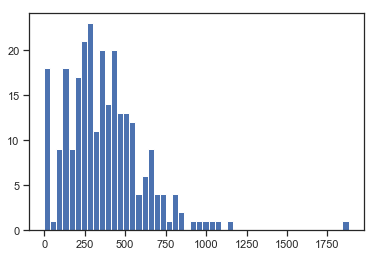

In [118]:
# Будем производить обработку данных из первого датасета
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Calories']])
plt.hist(data['Calories'], 50)
plt.show()

## 3.2. Масштабирование данных на основе [Z-оценки][5] - [StandardScaler][6]
---------
[5]: https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0
[6]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

c:\users\fulcrum\desktop\laba1\env\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\fulcrum\desktop\laba1\env\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


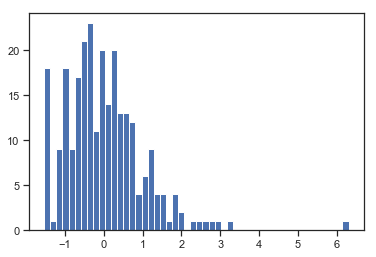

In [119]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Calories']])
plt.hist(sc2_data, 50)
plt.show()

## 3.3. [Нормализация данных][7]
------
[7]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

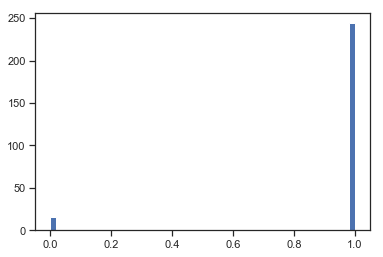

In [120]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Calories']])
plt.hist(sc3_data, 50)
plt.show()